running
a
-41.939103248366514


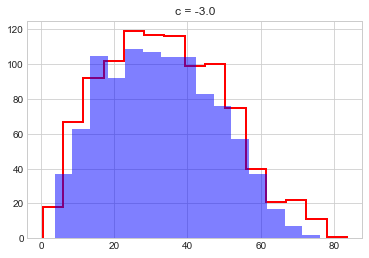

a
-42.26810347628996


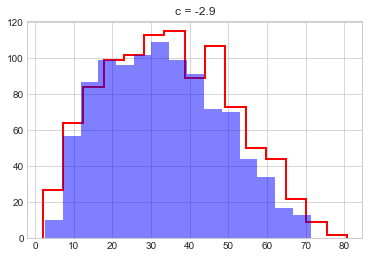

a
-41.447995957708166


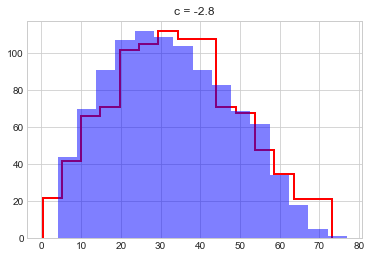

a
-41.447995957708166


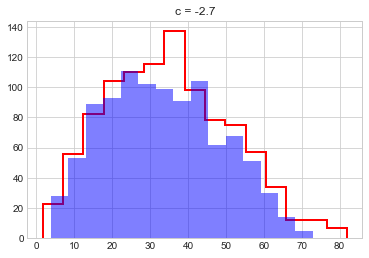

a
-35.77869806463773


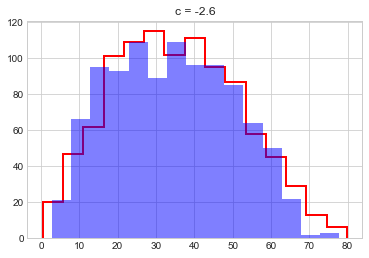

a
-37.312023480336975


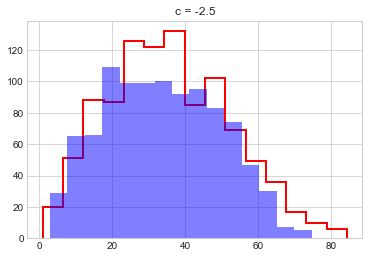

a
-38.247334257608124


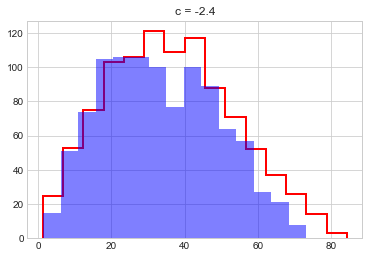

a
-37.76092443787648


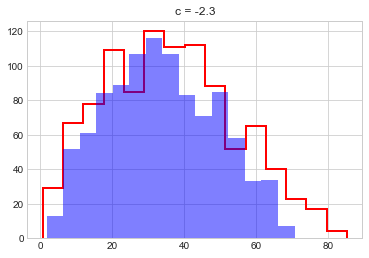

a
-36.235345417629965


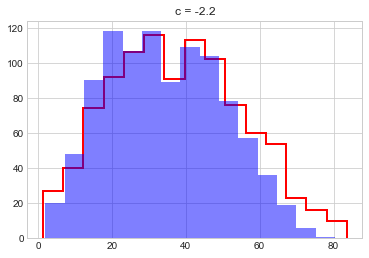

a
-32.646459903319176


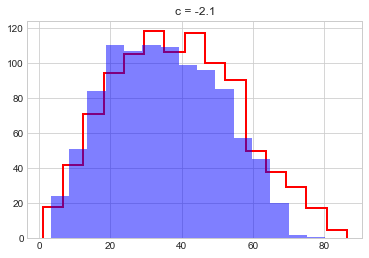

a
-33.245272225489536


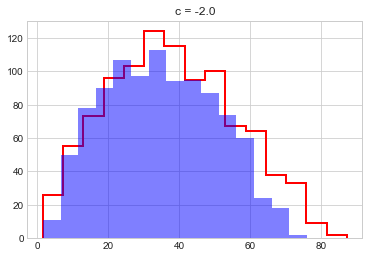

a
-35.62712042730081


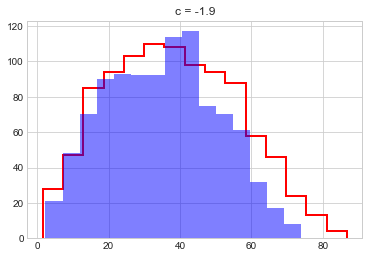

a
-33.88229064453046


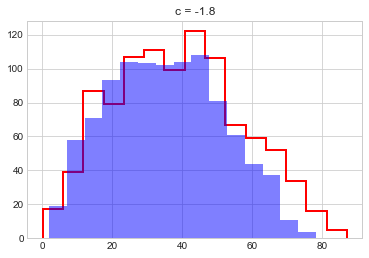

a
-28.878046307260174


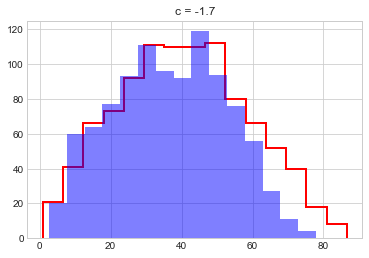

a
-28.726624267492735


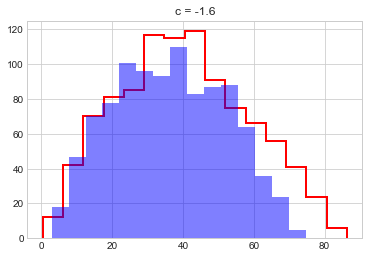

a
-29.060272726605703


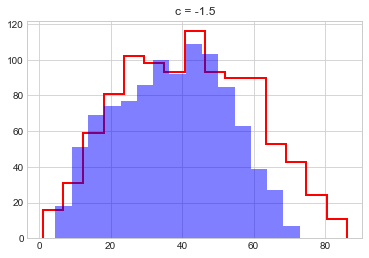

a
-27.189901309928267


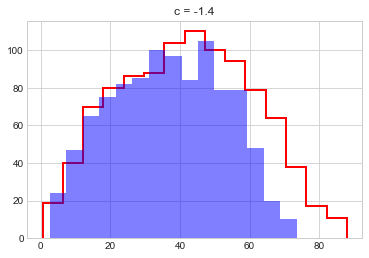

a
-27.692548425391468


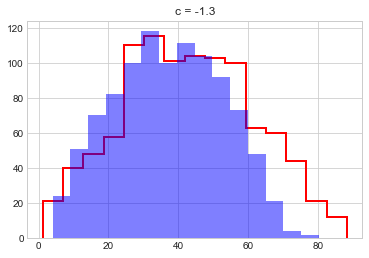

a
-26.589824511307196


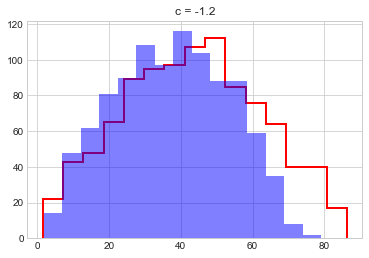

a
-24.702847485664105


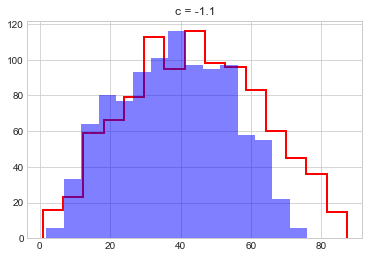

a
-21.82908840068375


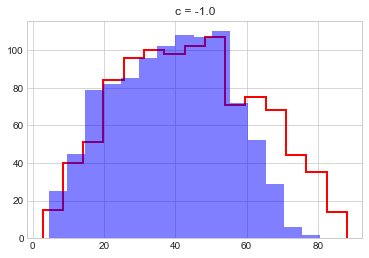

a
-22.266969505042994


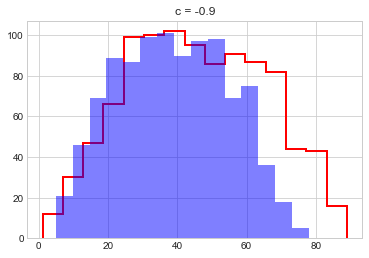

a
-23.033413588459542


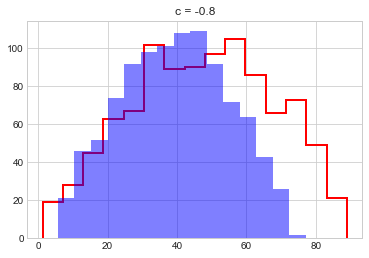

a
-19.40386392959831


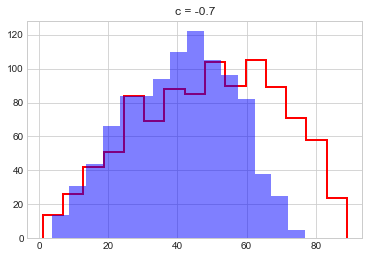

a
-17.166242857158142


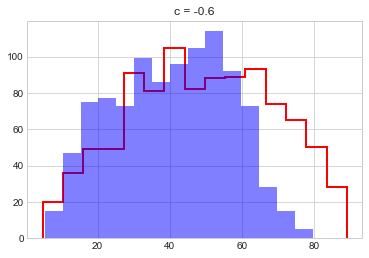

a
-19.192619548339486


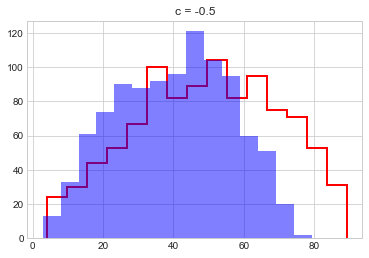

a
-16.64234190153975


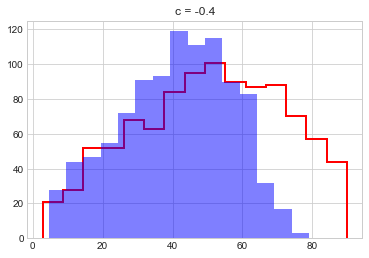

a
-15.954589770191003


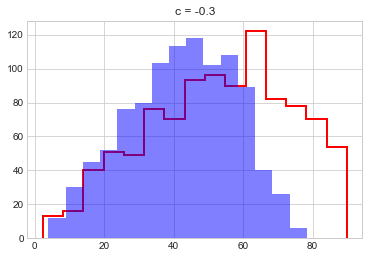

a
-12.147393109480056


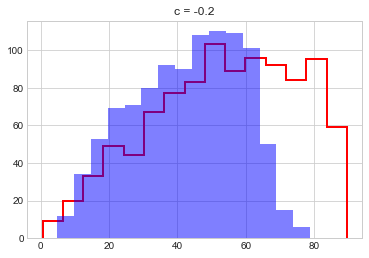

a
-13.049333721442553


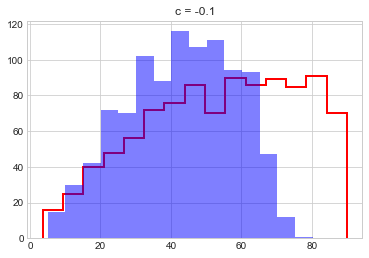

a
-11.380350091126692


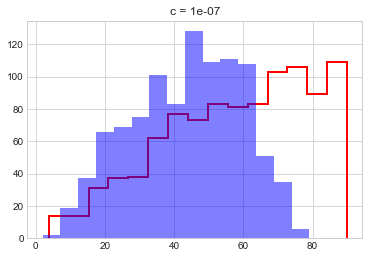

a
-6.396971544206049


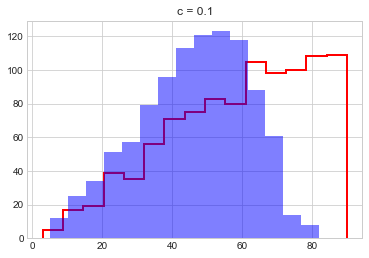

a
-7.308438985820025


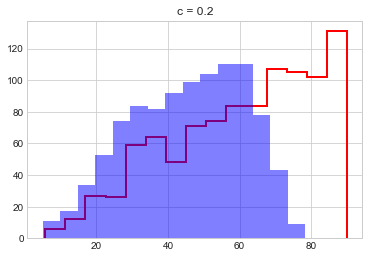

a
-5.9068862914609745


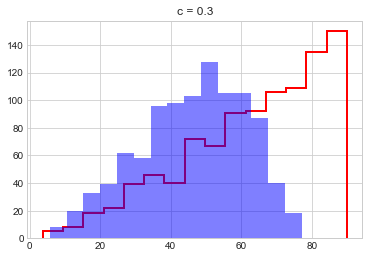

a
-4.130163014240096


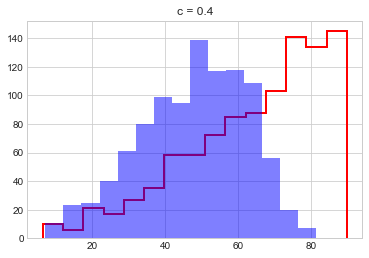

a
-4.451304098407907


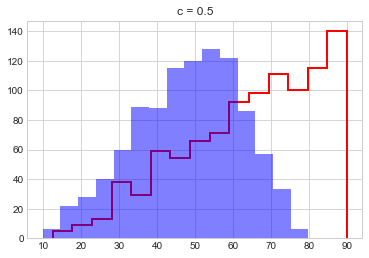

a
-3.4945150364792372


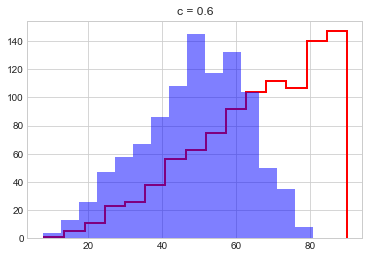

a
-2.9747156314602226


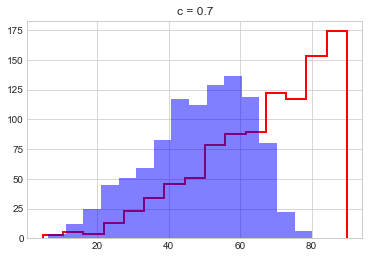

a
-4.506972322138221


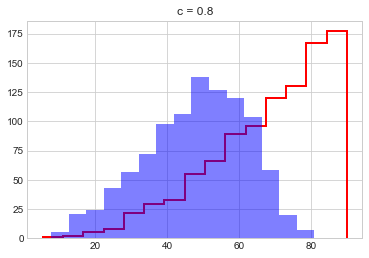

a
-2.1646816986546638


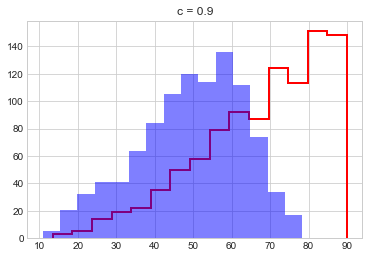

a
-1.931621883833082


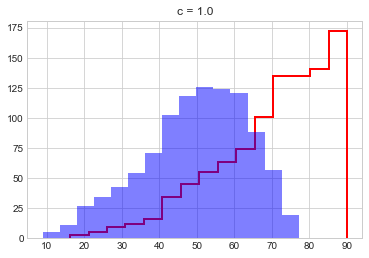

a
-1.8980862240740357


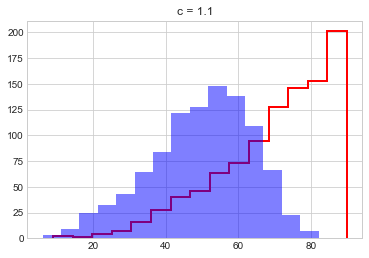

a
-2.177971597864122


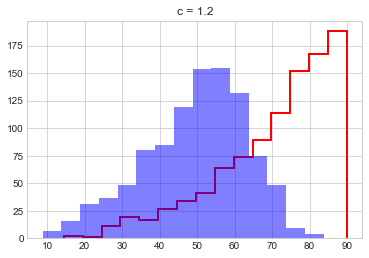

a
-1.9951907811959169


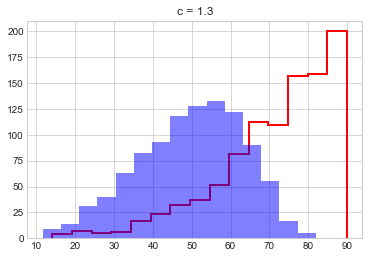

a
-0.6534118999417061


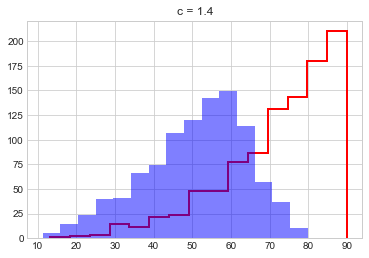

a
-0.8974326505455865


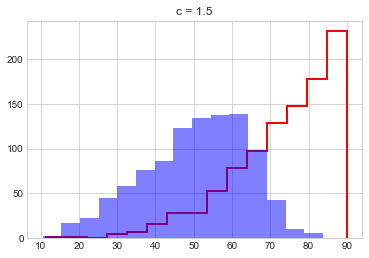

a
-0.38344359501284764


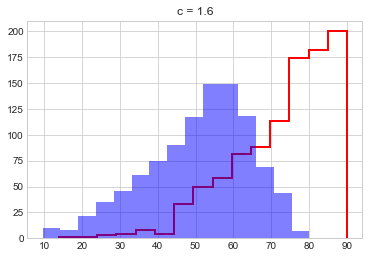

a
-1.0075090825254385


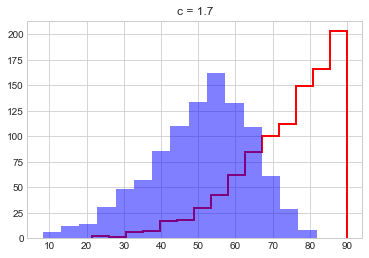

a
-0.6236000201611873


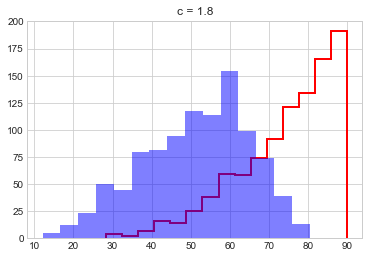

a
-0.7258697232367531


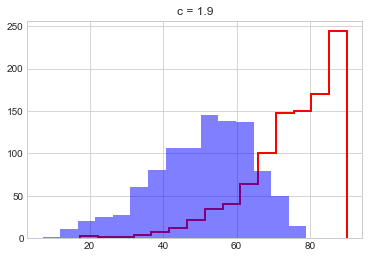

a
-0.26917863309911655


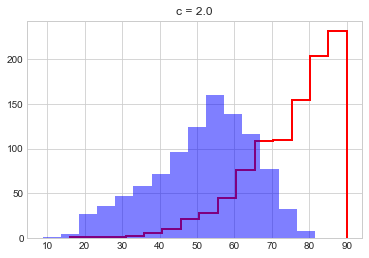

a
-0.48717676977579405


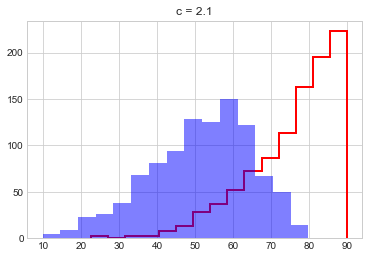

a
-0.20379139396246454


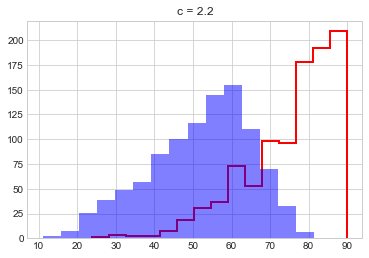

a
-0.3633584060857896


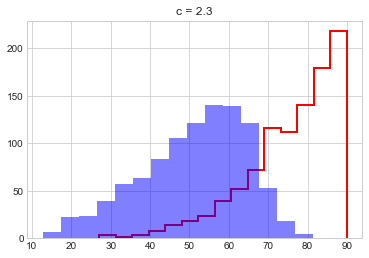

a
-0.25166940014216


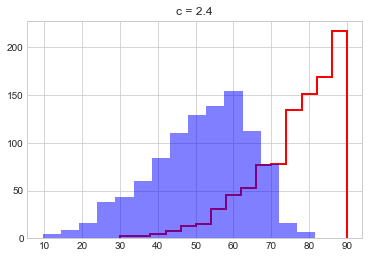

a
-0.3415147246201609


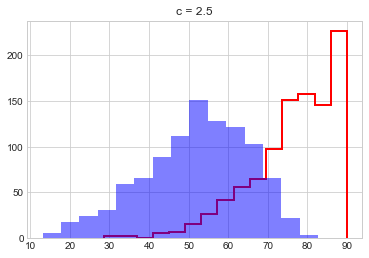

a
-0.5397792826960907


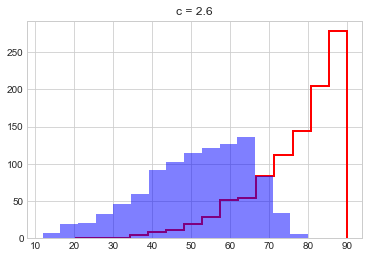

a
-0.37446760024881975


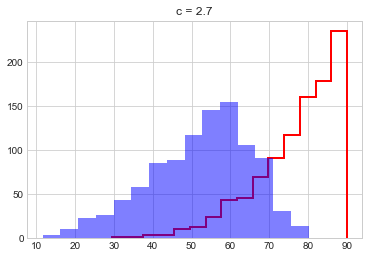

a
-0.4628168629184924


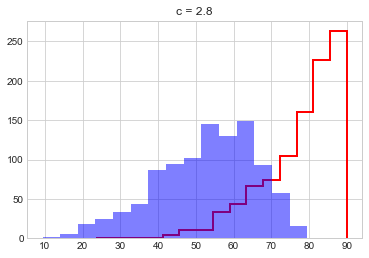

a
-0.401628634015618


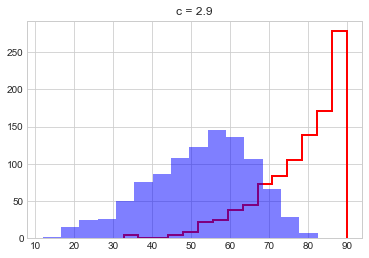

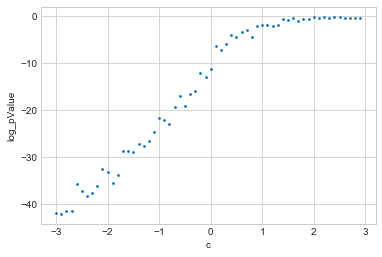

In [6]:
'''
generates fake data set by drawing cosI values from a modified beta distribution
- the c parameter varies from -3 to 3 and higher c values fit better with the distribution of real data
- red outline = true inclinations
- histogram = observed inclinations
'''
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import csv
import statistics
import random
import math
from scipy.stats import ks_2samp
#import scipy.stats as stats
#import seaborn as sns

data = genfromtxt('starsData.csv',delimiter=',',dtype='float')
#cols: vsini, e_vsini, prot, e_prot, radius, e_r
#e_prot of 0 means no error given
rows,cols=data.shape

RSun = 695700

width = int(2)
height = int(60)

grid = np.zeros((height,width))
print('running')
c = -30.0
for i in range(height):
    if c == 0:
        c = 0.000001
    grid[i][0] = c/10
    if c==0.000001:
        c = c-0.000001
    c = c+1

for i in range(height):
    print('a')
    IsummaryMedian = []
    IsummaryMean = []
    ItrueList = []
    c = grid[i][0]
    try:
        runMonte(data,c,IsummaryMedian,IsummaryMean,ItrueList)
        with open("modBeta(c)iList.txt", 'w') as f:
            for num in IsummaryMedian:
                f.write(str(num)+'\n')

        pValue = KSTest()
        log_pValue = math.log10(pValue)
        grid[i][1] = log_pValue
        print(log_pValue)


        for i in range(0,len(ItrueList)):
            ItrueList[i]=math.degrees(ItrueList[i])

        plt.hist(ItrueList,bins = 15, edgecolor='red', linewidth= 2,histtype = 'step')
        plt.hist(IsummaryMedian, bins = 15, color = 'blue', alpha = 0.5)
        plt.title('c = ' + str(c))
        plt.show()
    except:
        print('error c = '+str(c))

try:
    log_pValues = []
    cValues = []

    for i in range(height):
        cValues.append(grid[i][0])
        log_pValues.append(grid[i][1])

    with open("cValues.txt", 'w') as f:
        for num in cValues:
            f.write(str(num)+'\n')
    with open("log_pValues.txt", 'w') as f:
        for num in log_pValues:
            f.write(str(num)+'\n')
            

    plt.scatter(cValues, log_pValues, s=np.pi)
    #plt.plot(p, Y_pred, color='red')
    #plt.errorbar(p, v, yerr=e_v, fmt='.k')
    #plt.xlim(0, 90)
    plt.xlabel("c")
    plt.ylabel("log_pValue")
    plt.show()
except:
    print('error pt 2')


In [2]:
def runMonte(data,c,IsummaryMedian,IsummaryMean,ItrueList):
    for j in range(0,1000):
        #Rtrue = np.random.normal(random.choice(data[:,4]),random.choice(data[:,5]))
        #Ptrue = np.random.normal(random.choice(data[:,2]),random.choice(data[:,3]))
        index1 = random.randint(0,224)
        Rtrue = data[index1,4]
        e_Rtrue = data[index1,5]

        index2 = random.randint(0,224)
        Ptrue = data[index2,2]
        e_Ptrue = data[index2,3]
        Vtrue = 2*np.pi*Rtrue*RSun/(Ptrue*24*3600)

        r = random.uniform(0, 1)

        if c>0:
            f = 1/(1+c)
            cosI_random = 1 - (1-r)**f
        if c<0:
            g = 1/(1-c)
            cosI_random = r**g

        Itrue = np.arccos(cosI_random)
        
        ItrueList.append(Itrue)

        VSINItrue = Vtrue*np.sin(Itrue)

        e_VSINIobs = random.choice(data[:,1])
        VSINIobs = np.random.normal(VSINItrue,e_VSINIobs)
        Robs = np.random.normal(Rtrue,e_Rtrue)
        e_Robs = e_Rtrue
        Pobs = np.random.normal(Ptrue,e_Ptrue)
        e_Pobs = e_Ptrue

        Pmonte = np.random.normal(Pobs,e_Pobs,10000)
        Rmonte = np.random.normal(Robs,e_Robs,10000)
        VSINImonte = np.random.normal(VSINIobs,e_VSINIobs,10000)

        iSINImonte = VSINImonte/(2*np.pi*Rmonte*RSun/(Pmonte*24*3600))
        SINImonte = []

        for num in iSINImonte:
            if num>= 0 and num <=1:
                SINImonte.append(num)

        Imonte = np.arcsin(SINImonte)

        for i in range(0,len(Imonte)):
            Imonte[i]=math.degrees(Imonte[i])

        IsummaryMedian.append(statistics.median(Imonte))
        IsummaryMean.append(statistics.mean(Imonte))
        #print('done')


In [3]:
def KSTest():
    i_all = fileToList('i_all.txt')
    i_modBeta = fileToList('modBeta(c)iList.txt')
    result = ks_2samp(i_all,i_modBeta)
    return result.pvalue
    #need to return pvalue


In [4]:
def fileToList(name):
    my_file = open(name, "r")
    content = my_file.read()
    content_list = content.strip().split("\n")
    my_file.close()
    
    for i in range(len(content_list)):
        content_list[i]=float(content_list[i])
    return content_list